# Supervised Learning | Classification (Logistic Regression)

==========

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Configure plots
sns.set(style="whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None) 

#Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## Facebook Ads

### Importing & Extracting Features

In [3]:
fb_ads = pd.read_csv('/mnt/d/Self_Study/DEPI/4-ML/Day3/Assignment/facebook_ads (1).csv',encoding="ISO-8859-1")
fb_ads.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


## Exploratory data analysis

In [4]:
fb_ads.info()
# data of 499 rows and 6 columns
# dtypes: float64(1), int64(2), object(3) 
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [5]:
print('Shape:')
print(fb_ads.shape)
print('Columns:')
print(fb_ads.columns.tolist())
print('Described numeric:')
pd.DataFrame(fb_ads.describe(include=[np.number]))

Shape:
(499, 6)
Columns:
['Names', 'emails', 'Country', 'Time Spent on Site', 'Salary', 'Clicked']
Described numeric:


,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [6]:
print('Described object:')
pd.DataFrame(fb_ads.describe(include=['object']))

Described object:


,Names,emails,Country
count,499,499,499
unique,497,499,210
top,Seth,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Israel
freq,2,1,6


In [11]:
pd.DataFrame(fb_ads.isna().sum()) # Check for missing values for each column

,0
Names,0
emails,0
Country,0
Time Spent on Site,0
Salary,0
Clicked,0


<Axes: ylabel='count'>

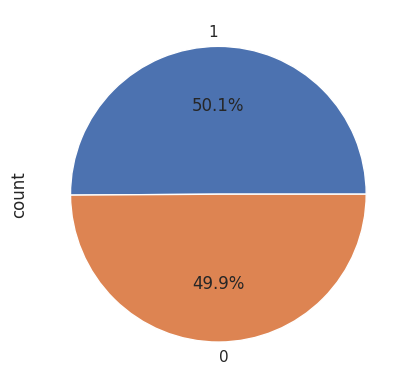

In [12]:
# Visualize clicked column as a pie chart
fb_ads['Clicked'].value_counts().plot.pie(autopct='%1.1f%%') #percentage of clicks 

In [13]:
clicked = fb_ads[fb_ads['Clicked']==1]
clicked

,Names,emails,Country,Time Spent on Site,Salary,Clicked
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
...,...,...,...,...,...,...
486,Cheryl,iaculis.enim@nislelementum.edu,Indonesia,41.544304,55792.69851,1
487,Courtney,porttitor.tellus@elitelit.org,Malaysia,43.281586,54123.64650,1
490,Jonah,augue@risusNuncac.co.uk,Myanmar,34.828303,50151.32622,1
491,Merrill,dolor.sit@turpisIn.com,Egypt,37.173216,63750.41558,1


In [14]:
not_clicked = fb_ads[fb_ads['Clicked']==0]
not_clicked

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.41153,0
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.87881,0
...,...,...,...,...,...,...
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,24.615228,34721.74862,0
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0


In [16]:
print("Total instances =", len(fb_ads))

print("Number of customers who clicked on Ad =", len(clicked))
print("Percentage Clicked =", 1.*len(clicked)/len(fb_ads)*100.0, "%")
 
print("Did not Click =", len(not_clicked))
print("Percentage who did not Click =", 1.*len(not_clicked)/len(fb_ads)*100.0, "%")

Total instances = 499
Number of customers who clicked on Ad = 250
Percentage Clicked = 50.1002004008016 %
Did not Click = 249
Percentage who did not Click = 49.899799599198396 %


## Feature Engineering

Drop Names and emails.                                                                                      
One-hot encode Country (or target encode if you prefer).                                                                                            
Standardize numeric features.                                                                   


In [17]:
# Drop names and emails
fb_ads = fb_ads.drop(columns=['Names', 'emails'])

In [18]:
#Encoding for country column
fb_ads['Country'] = fb_ads['Country'].astype('category').cat.codes # convert to categorical and then to codes

In [19]:
fb_ads

,Country,Time Spent on Site,Salary,Clicked
0,27,25.649648,55330.06006,0
1,17,32.456107,79049.07674,1
2,1,20.945978,41098.60826,0
3,41,54.039325,37143.35536,1
4,26,34.249729,37355.11276,0
...,...,...,...,...
494,160,19.222746,44969.13495,0
495,128,22.665662,41686.20425,0
496,208,35.320239,23989.80864,0
497,144,26.539170,31708.57054,0


In [ ]:
#standardize features to be on the same scales
scaler = StandardScaler()
fb_ads_scaled = scaler.fit_transform(fb_ads.drop(columns=['Clicked'])) # scale all columns except the target column


In [21]:
fb_ads_scaled

array([[-1.25375881, -0.79945766,  0.12825771],
       [-1.41990117, -0.05102869,  1.37859159],
       [-1.68572893, -1.31666684, -0.62194482],
       ...,
       [ 1.75341779,  0.26390739, -1.52382503],
       [ 0.69010673, -0.701647  , -1.11693508],
       [-1.30360152, -0.05872127,  1.12989966]], shape=(499, 3))

## Data Splitting 

In [22]:
X = fb_ads_scaled
y = fb_ads['Clicked']

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Model Training & Predicting

In [31]:
# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000)


In [32]:
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
# Make predictions
y_pred = logreg.predict(X_test)

### Model Evaluation & Prediction

In [34]:
# Evaluate the model when assigning the train test size to 75 - 25 %
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[60  2]
 [ 1 62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.97      0.98      0.98        63

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



In [ ]:
# Evaluate the model when assigning the train test size to 90 - 10
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[30  2]
 [ 0 18]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.90      1.00      0.95        18

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



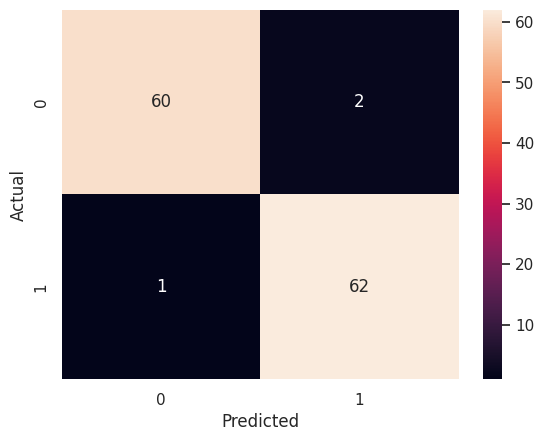

In [35]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

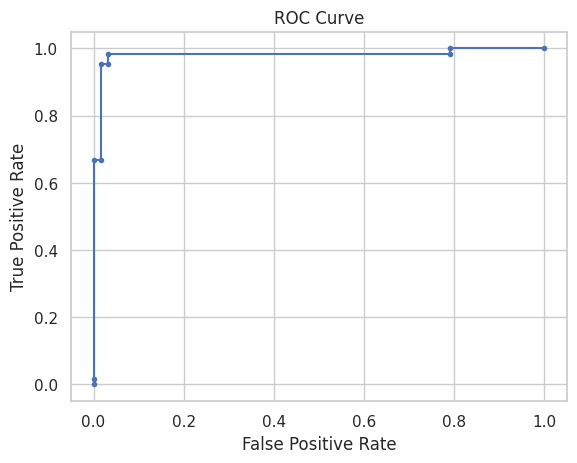

AUC Score: 0.9818228366615462


In [36]:
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score}")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


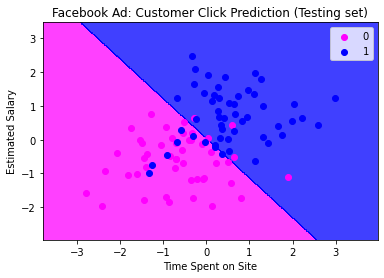

In [ ]:
# Visualising the Training set results 


# Another way and different results

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        62
           1       0.97      0.98      0.98        63

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125

Confusion matrix:
[[60  2]
 [ 1 62]]
ROC-AUC:
0.9818228366615462


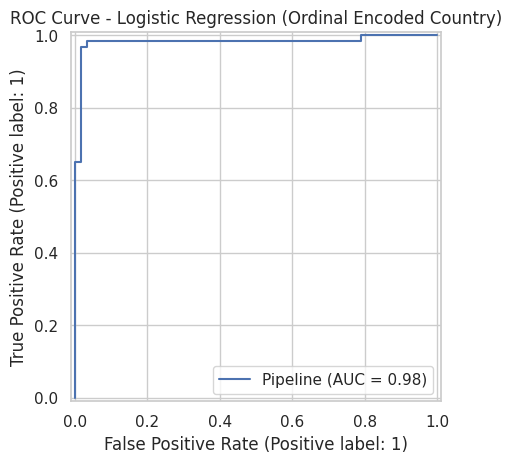

Top positive coefficients:
              feature      coef
1  Time Spent on Site  2.139589
2              Salary  2.024835
0             Country  0.003673
Top negative coefficients:
              feature      coef
1  Time Spent on Site  2.139589
2              Salary  2.024835
0             Country  0.003673
Saved model to file:
logreg_ordinal_pipeline.pkl
Finished training and evaluation of logistic regression with ordinal encoding


In [50]:
# Build a preprocessing + logistic regression pipeline using ordinal/label encoding for Country
# Drop Names and emails, encode Country with OrdinalEncoder, scale numerics, then train/test split and evaluate

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import joblib

# Use the dataframe loaded earlier: df_fbad

# Features/target
X = df_fbad.drop(columns=['Clicked', 'Names', 'emails'])
y = df_fbad['Clicked']

# Identify columns
categorical_cols = ['Country']
numeric_cols = ['Time Spent on Site', 'Salary']

# Preprocess: Ordinal encode Country, scale numerics
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ], remainder='drop'
)

# Model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Pipeline
pipe = Pipeline(steps=[('prep', preprocess), ('model', log_reg)])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Fit
pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred, output_dict=False)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print('Classification report:')
print(report)
print('Confusion matrix:')
print(cm)
print('ROC-AUC:')
print(roc_auc)

# Plot ROC curve
RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.title('ROC Curve - Logistic Regression (Ordinal Encoded Country)')
plt.show()

# Inspect coefficients by mapping back to feature names
# Get feature names after preprocessing
cat_features = categorical_cols
num_features = numeric_cols

# Build names in same order as transformer output
feature_names_out = []
feature_names_out.extend(cat_features)
feature_names_out.extend(num_features)

coefs = pipe.named_steps['model'].coef_.ravel()
coef_df = pd.DataFrame({'feature': feature_names_out, 'coef': coefs})
coef_df_sorted = coef_df.sort_values('coef', ascending=False)
print('Top positive coefficients:')
print(coef_df_sorted.head(5))
print('Top negative coefficients:')
print(coef_df_sorted.tail(5))

# Save artifacts
model_path = 'logreg_ordinal_pipeline.pkl'
joblib.dump(pipe, model_path)

print('Saved model to file:')
print(model_path)
print('Finished training and evaluation of logistic regression with ordinal encoding')


==========

# THANK YOU!